IN THIS SECTION, WE ARE REMOVING ALL THE GAPS AND EXTRA SPACES FROM A .CA FILE

In [79]:
file = open("2018-11-18-session_2.cha")

In [80]:
lines = file.readlines()

In [81]:
# this code removes a lot of (not all of) the special CA charactersv 
with open("2018-11-18-session_2-done.cha", "w") as f:
    for line in lines:
        if line[0:2] != "\t(":
            # if the line does not start with a tab, then replace all the following with nothing 
            line = line.replace("⌉  ", "⌉ ")
            line = line.replace("⌋  ", "⌋ ")
            line = line.replace("  ⌋  ", " ⌋")
            line = line.replace("s  ","s ")
            line = line.replace(")  ", ") ")
            line = line.replace("	 ","	") 
            line = line.replace("  &", " &")
            line = line.replace(":::",":")
            line = line.replace(":::",":")
            line = line.replace("::::",":")
            line = line.replace("[⌈]","")
            line = line.replace("> <", "")
            line = line.replace("[>]", "")
            f.write(line)
            

In [ ]:
IN THIS SECTION, WE REMOVE ALL LINES THAT START WITH GAP BECAUSE I MADE A MISTAKE

In [10]:
# you can ignore this code
file = open("newfile.ca")
lines = file.readlines()
with open("newfile2.ca", "w") as f:
    for line in lines:
        if line[0:2] != "*G":
            f.write(line)

IN THIS SECTION, WE ARE TAKING ELAN --> CHAT FILES AND ADJUSTING THE GAPS

The ELAN output has all gaps in a ton of decimals. .cha files should only have gaps that round to at least 300ms, and it should be formatted like (0.3)

In [11]:
file = open("2017-10-30-session-3-gaps.cha")

In [12]:
lines = file.readlines() 
import re 
import textwrap
    
with open("2017-10-30-session-3-gaps-done.cha", "w") as f:
    for line in lines:
        line = line.replace("  ", " ")
        line = line.replace("*REP:", "%rep:")
        # this bit is to just replace things that aren't the right format 
        
        if line[0] == "@": 
            # this is to skip the header information 
            f.write(line)
        elif line[0:5] == "*GAP:": 
            # all "gap" lines stat with "*GAP"
            gaplength = float(line[5:10])
            # this gets the gap 
            
            if gaplength <= .08:
                line = ("\t" + "LATCH" + "\n")
                f.write(line)
                # if there's less than an 80ms gap between turns, then place a latch symbol 
                
            else:
                gaplength = round(gaplength, 1)
                if gaplength >= .3:
                    line = ("\t" + "(" + str(gaplength) + ")" + line[11:len(line)])
                    f.write(line)
        else:
            line = line.replace("  ", " ")
            f.write(line)

# Goal: to extract FTOs. 
The plan: 

(1) Process turn one. Store the speaker, start time and end time. 
(2) Process turn two. Store the speaker, start time and end time. 
(3) Check to see whether turn two speaker = turn one speaker. If true, skip the rest. If they are different speakers, continue. 
(4) Calculate the difference in start times. If they are very similar (<80ms), then: 
-- if this is the first and second utterances, just skip. 
-- otherwise, compare the speaker of the second turn to the speaker of the turn before turn one. If they are different speakers, do (start time of turn two) - (end time of turn 0).
(5) otherwise, calcualte: (start time of turn two) - (end time of turn one)
(6) in a file, save: speaker of previous turn | end time of previous turn one | speaker of turn two | FTO between turn two and previous turn 

In [1]:
# create a class so you can make utterance objects and eventually manipulate them

class Turn: 
    # initializing function 
    def __init__(self, speaker, words, start_time, end_time): 
        self.speaker = speaker
        self.words = words 
        self.start_time = start_time
        self.end_time = end_time
        self.duration = end_time - start_time

### find-turn: 

this function creates a Turn object from a list of lines and a integer representing the turn to start off on. 

It returns the Turn object and the line number in the file. The line number is important because the function skips lines that do not start with *

In [2]:
# this is the function that finds the next non-gap, non-@ turn 
def find_turn(n, linelist): 
    # find something that is not a "*"
    while(linelist[n][0] != "*"): 
        n = n+1
    line = linelist[n]
    speaker = line.split(":")[0]
    times = line.split("\x15")[1]
    start_time = int(times.split("_")[0])
    end_time = int(times.split("_")[1])
    words = line.split(":")[1]
    words = words.split("\x15")[0]
    return Turn(speaker, words, start_time, end_time), n

### calculate_fto: 

This function takes two Turns and calculates the FTO between them. You MUST input the first turn first and the second turn second.

If the speakers of the two turns are the same, this function returns -99,999 miliseconds (-99 seconds). If the speakers of the two turns are different but start at very similar times, this function returns 99,999 (99 seconds). 

In [3]:
def calculate_fto(second, first): 
    if abs(second.start_time - first.start_time) < 80: 
        return 99999
    # elif first.speaker == second.speaker: 
    #   return -99999
    else: 
        # print(second.start_time, first.end_time, second.start_time - first.end_time)
        FTO = second.start_time - first.end_time
        return FTO

In [4]:
def make_FTO_string(turn1, turn2, FTO, n): 
    return (str(n) + "," + turn2.speaker + "," + str(turn2.start_time) +"," + str(turn2.end_time) + "," + turn2.words + "," + str(FTO) + "," + turn1.words + "," + str(turn1.start_time) + "," + str(turn1.end_time) + "," + turn1.speaker + "\n")

In [5]:
file = open("2018-11-06-session-3.cha")
lines = file.readlines() 
n = 0 

# create three Turns
twobefore_turn, n = find_turn(n, lines)
onebefore_turn, n = find_turn(n+1, lines)
current, n = find_turn(n+1, lines) 

FileNotFoundError: [Errno 2] No such file or directory: '2018-11-06-session-3.cha'

In [87]:
proportion = .3
chars_after = .3 * len(newtext)
index = len(newtext) - round(chars_after)

newtext = newtext[:index] + "⌈" + newtext[index:] + "⌉"
print(newtext)

this is a practi⌈⌈ce test⌉⌉


In [5]:
### THIS CELL WILL REPLACE OVERLAP MARKERS AND LATCHES. BUT!!! IT WILL REMOVE METADATA AND CODES. 
# MAKE SURE TO REPLACE THE METADATA AND CODES AFTER THIS, AS WELL 
# AS RUN THE FIX_BULLETS AND INDENT COMMANDS IN CLAN
import re
file = open("2017-10-30-session-3.cha")
lines = file.readlines() 
n = 0 

# create three Turns
twobefore_turn, n = find_turn(n, lines)
onebefore_turn, n = find_turn(n+1, lines)
current, n = find_turn(n+1, lines)

with open("2017-10-30-session-3-new.cha", "w") as f:
    # we only want to process twobefore at the beginning
    twobefore_turn.words = twobefore_turn.words.replace('⌉', '')
    twobefore_turn.words = twobefore_turn.words.replace('&=laughs', '')
    twobefore_turn.words = onebefore_turn.words.replace('&=Laughs', '')
    twobefore_turn.words = twobefore_turn.words.replace('⌋', '')
    twobefore_turn.words = twobefore_turn.words.replace('⌈', '')
    twobefore_turn.words = twobefore_turn.words.replace('⌊', '')
    twobefore_turn.words = twobefore_turn.words.replace(':', '')
    twobefore_turn.words = twobefore_turn.words.replace('≈', '')
    twobefore_turn.words = twobefore_turn.words.replace('  ', ' ').strip()
    
    while lines[n+1][0] != "@" and (lines[n][0] == "*"): 
        FTO = calculate_fto(onebefore_turn, twobefore_turn)
    
        # strip the turns and remove all current overlap markers    
        onebefore_turn.words = onebefore_turn.words.replace('⌉ ', '')
        onebefore_turn.words = onebefore_turn.words.replace('&=laughs', '')
        onebefore_turn.words = onebefore_turn.words.replace('&=Laughs', '')
        onebefore_turn.words = onebefore_turn.words.replace('⌋', '')
        onebefore_turn.words = onebefore_turn.words.replace('⌈', '')
        onebefore_turn.words = onebefore_turn.words.replace('⌊', '')
        onebefore_turn.words = onebefore_turn.words.replace(':', '')
        onebefore_turn.words = onebefore_turn.words.replace('≈', '')
        onebefore_turn.words = onebefore_turn.words.replace('  ',' ').strip()

        # add an overlap marker if the FTO is negative
        if (FTO < 0):
            print("line n: ", n, " has a negative FTO")
            # if FTO is negative, then the previous turn should have an overlap till the end
            # the current turn should have an overlap marker at the beginning of the turn
            # we need to calculate where the other two overlap markers belong 
            before_proportion = abs(FTO) / twobefore_turn.duration
            after_proportion = abs(FTO) / onebefore_turn.duration
            
            # before_char figures out how far into the previous turn to start the overlap 
            before_char = round(before_proportion * len(twobefore_turn.words))
            if (before_char == 0): 
                before_char = 1
                
            # after_char figures out how far into the current turn to end the overlap 
            after_char = round(after_proportion * len(onebefore_turn.words))
            if (after_char == 0): 
                after_char = 1

            # before index in the index we'll use to place the starting overlap in the first turn
            before_index = len(twobefore_turn.words) - before_char     
            
            # after_index is the index we'll use to place the ending overlap in the second turn 
            after_index = after_char
            
            # does the first turn end after the second turn? 
            if (twobefore_turn.end_time > onebefore_turn.end_time): 
                # if so, we need to figure out where to put the ending overlap 
                prop = (twobefore_turn.end_time - onebefore_turn.end_time) / twobefore_turn.duration
                yikes_index = len(twobefore_turn.words) - round(prop * len(twobefore_turn.words))
            else: 
                yikes_index = len(twobefore_turn.words)
            
            before_text = twobefore_turn.words[:before_index] + "⌈" + twobefore_turn.words[before_index:yikes_index] + "⌉" + twobefore_turn.words[yikes_index:]
            twobefore_turn.words = before_text 
            
            after_text = "⌊" + onebefore_turn.words[:after_index] + "⌋" + onebefore_turn.words[after_index:]
            #print(onebefore_turn.words)
            onebefore_turn.words = after_text 

        if (FTO < 80 and FTO > 0): 
            twobefore_turn.words = twobefore_turn.words + "≈"
            onebefore_turn.words = "≈" + onebefore_turn.words 
        
        f.write(twobefore_turn.speaker + ":\t" + twobefore_turn.words + "    " + "•" + str(twobefore_turn.start_time) + "_" + str(twobefore_turn.end_time) + "•\n")
        
        twobefore_turn = onebefore_turn
        onebefore_turn = current
        current, n = find_turn(n+1, lines)
    
    f.write(twobefore_turn.speaker + ":\t" + twobefore_turn.words + "    " + "•" + str(twobefore_turn.start_time) + "_" + str(twobefore_turn.end_time) + "•\n")
    f.write(onebefore_turn.speaker + ":\t" + onebefore_turn.words + "    " + "•" + str(onebefore_turn.start_time) + "_" + str(onebefore_turn.end_time) + "•\n")



line n:  11  has a negative FTO
line n:  21  has a negative FTO
line n:  25  has a negative FTO
line n:  28  has a negative FTO
line n:  29  has a negative FTO
line n:  32  has a negative FTO
line n:  34  has a negative FTO
line n:  35  has a negative FTO
line n:  38  has a negative FTO
line n:  39  has a negative FTO
line n:  42  has a negative FTO
line n:  44  has a negative FTO
line n:  51  has a negative FTO
line n:  52  has a negative FTO
line n:  53  has a negative FTO
line n:  59  has a negative FTO
line n:  60  has a negative FTO
line n:  61  has a negative FTO
line n:  62  has a negative FTO
line n:  66  has a negative FTO
line n:  67  has a negative FTO
line n:  68  has a negative FTO
line n:  70  has a negative FTO
line n:  74  has a negative FTO
line n:  75  has a negative FTO
line n:  76  has a negative FTO
line n:  77  has a negative FTO
line n:  82  has a negative FTO
line n:  83  has a negative FTO
line n:  88  has a negative FTO
line n:  92  has a negative FTO
line n: 

line n:  994  has a negative FTO
line n:  997  has a negative FTO
line n:  998  has a negative FTO
line n:  1002  has a negative FTO
line n:  1004  has a negative FTO
line n:  1006  has a negative FTO
line n:  1010  has a negative FTO
line n:  1014  has a negative FTO
line n:  1017  has a negative FTO
line n:  1019  has a negative FTO
line n:  1020  has a negative FTO
line n:  1022  has a negative FTO
line n:  1029  has a negative FTO
line n:  1035  has a negative FTO
line n:  1038  has a negative FTO
line n:  1041  has a negative FTO
line n:  1042  has a negative FTO
line n:  1044  has a negative FTO
line n:  1045  has a negative FTO
line n:  1047  has a negative FTO
line n:  1052  has a negative FTO
line n:  1057  has a negative FTO
line n:  1059  has a negative FTO
line n:  1060  has a negative FTO
line n:  1063  has a negative FTO
line n:  1069  has a negative FTO
line n:  1071  has a negative FTO
line n:  1072  has a negative FTO
line n:  1075  has a negative FTO
line n:  1078  ha

In [292]:
file = open("2018-11-06-session-1.cha")
lines = file.readlines() 

n = 0 
# create three Turns
twobefore_turn, n = find_turn(n, lines)
onebefore_turn, n = find_turn(n+1, lines)
current, n = find_turn(n+1, lines)

# create the .txt file and make the headers 
f = open("demofile2.txt", "a")
f.write("line," + "previousturn_speaker," + "previousturn_starttime," + "previousturn_endtime," + "previous_turn," + "FTO," + "next_turn," + "nextturn_starttime," + "nextturn_endtime," + "nextturn_speaker" + "\n")

# calculate the first FTO and add to the file 
first_FTO = calculate_fto(onebefore_turn, twobefore_turn)
if abs(first_FTO) < 90000: 
    f.write(make_FTO_string(onebefore_turn, twobefore_turn, first_FTO, n))

FileNotFoundError: [Errno 2] No such file or directory: '2018-11-06-session-1.cha'

In [71]:
# while the rest of the file is going on: 
while lines[n+1][0] != "@" and lines[n][0] == "*": 
    print(str(n))
    # first, calculate FTO between current and previous 
    if twobefore_turn.end_time > onebefore_turn.end_time: 
        onebefore_turn = twobefore_turn
    
    FTO = calculate_fto(current, onebefore_turn)

    # if the result is fine, add the FTO and incrementore
    if abs(FTO) < 90000: 
        print("abs FTO < 90000")
        f.write(make_FTO_string(current, onebefore_turn, FTO, n))
        print("moving on")
        twobefore_turn = onebefore_turn
        onebefore_turn = current
        current, n = find_turn(n+1, lines)
    
    # otherwise, if it's positive 99999 (they began speaking at almost exactly the same time)
    elif FTO > 90000: 
        print("FTO is greater than 90000")
        
    # then check the FTO between current and twobefore 
        FTO = calculate_fto(current, twobefore_turn)
    
    # if that result is fine, add the FTO 
        if abs(FTO) < 90000: 
            print("abs FTO 2 is < 90000")
            f.write(make_FTO_string(current, twobefore_turn, FTO, n))
            print("moving on")
            twobefore_turn = onebefore_turn
            onebefore_turn = current
            current, n = find_turn(n+1, lines)
    
        else: 
            print("abs FTO is < 90000")
            print("moving on")
            twobefore_turn = onebefore_turn
            onebefore_turn = current
            current, n = find_turn(n+1, lines)
            
    else:
        print("moving on")
        twobefore_turn = onebefore_turn
        onebefore_turn = current
        current, n = find_turn(n+1, lines)
            
# close the file
f.close()

13
61881 54076 7805
abs FTO < 90000
moving on
14
65602 65646 -44
abs FTO < 90000
moving on
16
67065 65986 1079
abs FTO < 90000
moving on
17
67893 68769 -876
abs FTO < 90000
moving on
19
73181 69030 4151
abs FTO < 90000
moving on
21
82695 80767 1928
abs FTO < 90000
moving on
23
89995 89258 737
abs FTO < 90000
moving on
24
94488 94600 -112
abs FTO < 90000
moving on
25
95046 95250 -204
abs FTO < 90000
moving on
27
102962 101895 1067
abs FTO < 90000
moving on
29
103820 103216 604
abs FTO < 90000
moving on
30
103918 104779 -861
abs FTO < 90000
moving on
31
105439 105360 79
abs FTO < 90000
moving on
33
105541 107000 -1459
abs FTO < 90000
moving on
34
108567 108720 -153
abs FTO < 90000
moving on
35
111111 111334 -223
abs FTO < 90000
moving on
36
111651 111786 -135
abs FTO < 90000
moving on
37
114297 114595 -298
abs FTO < 90000
moving on
38
115023 114818 205
abs FTO < 90000
moving on
39
119590 119939 -349
abs FTO < 90000
moving on
40
120369 120172 197
abs FTO < 90000
moving on
41
124488 125683

abs FTO < 90000
moving on
572
1140234 1140245 -11
abs FTO < 90000
moving on
573
1140671 1140586 85
abs FTO < 90000
moving on
574
1146287 1146082 205
abs FTO < 90000
moving on
575
1146872 1147224 -352
abs FTO < 90000
moving on
578
1148097 1147224 873
abs FTO < 90000
moving on
579
1148855 1148733 122
abs FTO < 90000
moving on
581
1153677 1152074 1603
abs FTO < 90000
moving on
582
1154819 1154804 15
abs FTO < 90000
moving on
584
1158813 1157266 1547
abs FTO < 90000
moving on
586
1161579 1159446 2133
abs FTO < 90000
moving on
588
1167023 1165869 1154
abs FTO < 90000
moving on
589
1168556 1168480 76
abs FTO < 90000
moving on
590
1168905 1168908 -3
abs FTO < 90000
moving on
591
1173517 1173340 177
abs FTO < 90000
moving on
592
1178557 1178511 46
abs FTO < 90000
moving on
594
1179281 1178918 363
abs FTO < 90000
moving on
595
1182479 1183100 -621
abs FTO < 90000
moving on
597
1183940 1183100 840
abs FTO < 90000
moving on
599
1188099 1187710 389
abs FTO < 90000
moving on
600
1188269 1188437 -16

# GOAL: to calculate the relevant FTOs / durations for analysis
This includes: 
<b>FTOs</b> 
(1) trouble source FTO
(2) OIR FTO 
(3) solution FTO 

<b>Durations</b>
(4) trouble source duration
(5) OIR duration
(6) solution duration

<b>speaker data</b> 
(7) trouble source speaker 
(8) OIR speaker 
(9) solution speaker

<b>turns</b> 
(10) trouble source turn 
(11) OIR turn 
(12) solution turn

<b>metadata</b> 
(13) file name 
(14) line number of trouble source
(15) 

<b>other values</b>
overlapping talk during the trouble source that doesn't come from the trouble source (can I even analyze this?) 
also, probability the OIR FTO comes from the general distribution of FTOs

Note: someone will have to make sure the solution is a real solution! 


In [72]:
#pip install pandas 
#pip install xlrd
import pandas as pd 
import xlrd

In [1]:
file = open("2018-11-06-session-1.cha")
lines = file.readlines()

In [3]:
print(lines[10])

	(0.5) 217895_218426



In [73]:
data = pd.read_excel(file)

print(data)

     line previousturn_speaker  previousturn_starttime  previousturn_endtime  \
0      13                 *SP2                   52306                 53725   
1      13                 *SP1                   53606                 54076   
2      14                 *SP2                   61881                 65646   
3      16                 *SP1                   65602                 65986   
4      17                 *SP2                   67065                 68769   
5      19                 *SP1                   67893                 69030   
6      21                 *SP2                   73181                 80767   
7      23                 *SP1                   82695                 89258   
8      24                 *SP2                   89995                 94600   
9      25                 *SP1                   94488                 95250   
10     27                 *SP2                   95046                101895   
11     29                 *SP1          

In [98]:
is_OIR = data['OIR?']=="X"
OIRs = data[is_OIR]
nonOIRs = data[is_OIR== False]
nonOIR_FTOs = nonOIRs['FTO']

TypeError: '<=' not supported between instances of 'int' and 'str'

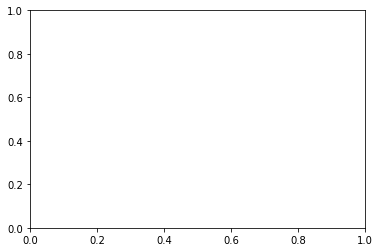

In [104]:
import matplotlib.pyplot as plt
plt.hist(nonOIR_FTOs.values)

In [109]:
nonOIR_FTOs.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [107]:
nonOIR_FTOs.values[:]

array([-119, 7805, -44, 1079, -876, 4151, 1928, 737, -112, -204, 1067,
       604, -861, 79, -1459, -153, -223, -135, -298, 205, -349, 197,
       -1195, -330, -253, -158, 130, -88, -539, 802, 216, -56, -687, 277,
       207, 93, -832, -233, 360, -223, -547, -114, 1279, 417, -1179, 1597,
       -89, 51, -244, -244, 88, -18, -112, -228, 730, 784, 323, 660, 78,
       -360, 175, -415, -272, 33, '‚åâ ', '‚åâ ', 282, -6, -16, ' ', 88,
       105, 1268, 205, 35, -200, 1772, -112, 1609, 398, -512, -3526, 56,
       -29, 329, -448, 151, -386, 235, -407, -211, 237, 70, 159, 1167,
       -441, 1144, -441, -384, 602, -368, 774, 1070, -175, -220, 381,
       -1426, 282, 184, -1098, 262, -381, 128, 181, -42, 286, -314, 1490,
       686, 291, -3589, 97, -102, 40, 21, 523, -32, 86, -2119, -214, 581,
       551, 1796, 1257, -6, 158, -621, -400, -798, -1369, 2287, 300, -175,
       -25, -252, 212, 507, 591, -477, 827, 1067, -569, 437, -250, -20,
       114, -156, 1123, -1039, -25, -342, 889, 33, -1789

In [53]:
hmm["FTO"]

1    7805
Name: FTO, dtype: object

In [ ]:
# if the "OIR?" file is "X", then do the following 

# get the FTO of that row (the OIR FTO)

# get the FTO of the previous row (the trouble source FTO)

# get the FTO of the next row (the solution FTOd)

In [21]:
import os
import glob

writefile = open("trythis.txt", "a")

for filename in glob.glob('*.cha'):
    with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
        for line in f: 
            if line[0] == "*": 
                writefile.write(line)
                
        writefile.write("<|endoftext|>\n")

writefile.close()

In [14]:
os.getcwd()

'/Users/julia/Desktop'